<IPython.core.display.Javascript object>


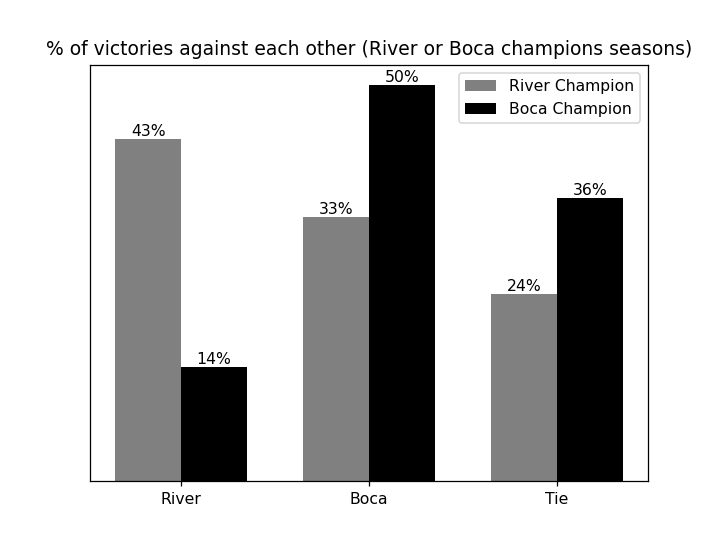

In [1]:
#You have first to download in html format the webpages of the following links to your working directory:
#https://es.wikipedia.org/wiki/Primera_Divisi%C3%B3n_de_Argentina (and name it 'Primera')
#https://es.wikipedia.org/wiki/Supercl%C3%A1sico_del_f%C3%BAtbol_argentino (and name it 'Superclásico')

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

%matplotlib notebook

Champions = pd.read_html('Primera.html')
SCWinners = pd.read_html('Superclásico.html')

tables = [Champions[int((i+0.5)*2)] for i in range(3,13)]

championsTable = pd.concat([tables[i] for i in range(len(tables))])

winnersTable = SCWinners[9]

championsTable=championsTable.reset_index().iloc[:,1:]

def sub(x):
    return re.sub(r'\s\([0-9]{2}\)','',x)
    
championsTable['Temporada'] = championsTable['Temporada'].apply(str)
    
championsTable['Temporada'] = championsTable['Temporada'].apply(lambda x: re.sub(r'\s\(LAF\)','',x))
                  
championsTable['Campeón'] = championsTable['Campeón'].apply(sub)

championsTable = championsTable[(championsTable['Campeón'] == 'River Plate')|
                                (championsTable['Campeón'] == 'Boca Juniors')].reset_index().iloc[:,1:]

championsTable['Torneo'] = championsTable['Torneo'].apply(lambda x: re.sub(r'Primera División.+',r'Primera División',x))

championsTable['Y&C'] = championsTable['Torneo'] + ' ' + championsTable['Temporada'].astype(str)

championsTable['Y&C'] = championsTable['Y&C'].apply(lambda x: re.sub(r'(?<=Apertura\s[0-9]{4})-[0-9]{2}','',x))

championsTable['Y&C'] = championsTable['Y&C'].apply(lambda x: re.sub(r'(?<=Clausura\s)19[0-9]{2}-(?=[0-9]{2})','19',x))
championsTable['Y&C'] = championsTable['Y&C'].apply(lambda x: re.sub(r'(?<=Clausura\s)20[0-9]{2}-(?=[0-9]{2})','20',x))

championsTable['Y&C'] = championsTable['Y&C'].apply(lambda x: re.sub(r'Clausura 1900',r'Clausura 2000',x))

championsTable['Y&C'] = championsTable['Y&C'].apply(lambda x: re.sub(r'Clausura',r'Torneo Clausura',x))
championsTable['Y&C'] = championsTable['Y&C'].apply(lambda x: re.sub(r'Apertura',r'Torneo Apertura',x))

championsTable['Y&C'] = championsTable['Y&C'].apply(lambda x: re.sub(r'Primera División',r'Campeonato',x))

championsTable['Y&C'] = championsTable['Y&C'].apply(lambda x: re.sub(r'Copa de Oro',r'Copa de Honor',x))

championsTable['Y&C'] = championsTable['Y&C'].apply(lambda x: re.sub(r'(?<=Campeonato\s19[0-9]{2})-(?=[0-9]{2})','-19',x))
championsTable['Y&C'] = championsTable['Y&C'].apply(lambda x: re.sub(r'(?<=Campeonato\s20[0-9]{2})-(?=[0-9]{2})','-20',x))
championsTable['Y&C'] = championsTable['Y&C'].apply(lambda x: re.sub(r'Final 2013-14','Torneo Final 2014',x))

winnersTable = winnersTable.iloc[0:212,:]

championsTable = championsTable[['Campeón','Y&C']]
winnersTable = winnersTable[['Torneo','Local','Visitante','Resultado']] 

df = pd.merge(left = championsTable, right = winnersTable, how='inner', left_on='Y&C', right_on='Torneo')

df['Resultado'] = df['Resultado'].apply(lambda x:re.sub(r'\*\*','',x))

winnerList = []

for i in range(len(df)):
    if df['Resultado'].iloc[i][0] > df['Resultado'].iloc[i][2]:
        winnerList.append(df['Local'].iloc[i])
    elif df['Resultado'].iloc[i][0] < df['Resultado'].iloc[i][2]:
        winnerList.append(df['Visitante'].iloc[i])
    else:
        winnerList.append('Empate')
        
df['Winner'] = winnerList

RiverW = df[df['Campeón']=='River Plate']
BocaW = df[df['Campeón']=='Boca Juniors']

RiverPctgC = len(RiverW[RiverW['Winner']=='River Plate'])/len(RiverW)
BocaPctgNC = len(RiverW[RiverW['Winner']=='Boca Juniors'])/len(RiverW)
EmpateRiver = len(RiverW[RiverW['Winner']=='Empate'])/len(RiverW)
RiverPctgNC = len(BocaW[BocaW['Winner']=='River Plate'])/len(BocaW)
BocaPctgC = len(BocaW[BocaW['Winner']=='Boca Juniors'])/len(BocaW)
EmpateBoca = len(BocaW[BocaW['Winner']=='Empate'])/len(BocaW)

width = 0.5

xticks = ['River Champion', 'Boca Champion']

y1 = [RiverPctgC,RiverPctgNC]
y2 = [BocaPctgNC,BocaPctgC]
y3 = [EmpateRiver,EmpateBoca]
x = np.arange(len(y1))

fig, ax = plt.subplots()

bars1 = ax.bar(x - width/3,y1, width/3,  color = 'black')
bars2 = ax.bar(x,y2, width/3, color = 'grey')
bars3 = ax.bar(x + width/3,y3, width/3, color = 'grey', alpha =0.2)
ax.set_xticks(x)
ax.set_xticklabels(xticks)

ax.legend(['River victory', 'Boca Victory', 'Tie'])

ax.bar_label(bars1, labels= ["{:.0%}".format(y1[0]),"{:.0%}".format(y1[1])])
ax.bar_label(bars2, labels= ["{:.0%}".format(y2[0]),"{:.0%}".format(y2[1])])
ax.bar_label(bars3, labels= ["{:.0%}".format(y3[0]),"{:.0%}".format(y3[1])])

ax.set_title('Historical % of victories (years in which either of them was the chamipon)')

ax.get_children()[17].set_visible(False)